<a href="https://colab.research.google.com/github/Samiimasmoudii/ML-Course-/blob/main/TP_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
df = load_iris() #Charger iris dans un data fram



In [ ]:
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
x = df.data
y= df.target


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)


In [ ]:
dt.fit(x_train , y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
print ( 'train_score = ', dt.score(x_train, y_train))
print ( 'test_score = ', dt.score(x_test, y_test))

train_score =  1.0
test_score =  0.9111111111111111


In [ ]:
x_new = np.array([0.3,0.5,2,6]).reshape(1,4)
y_new = dt.predict(x_new)
y_new

array([2])

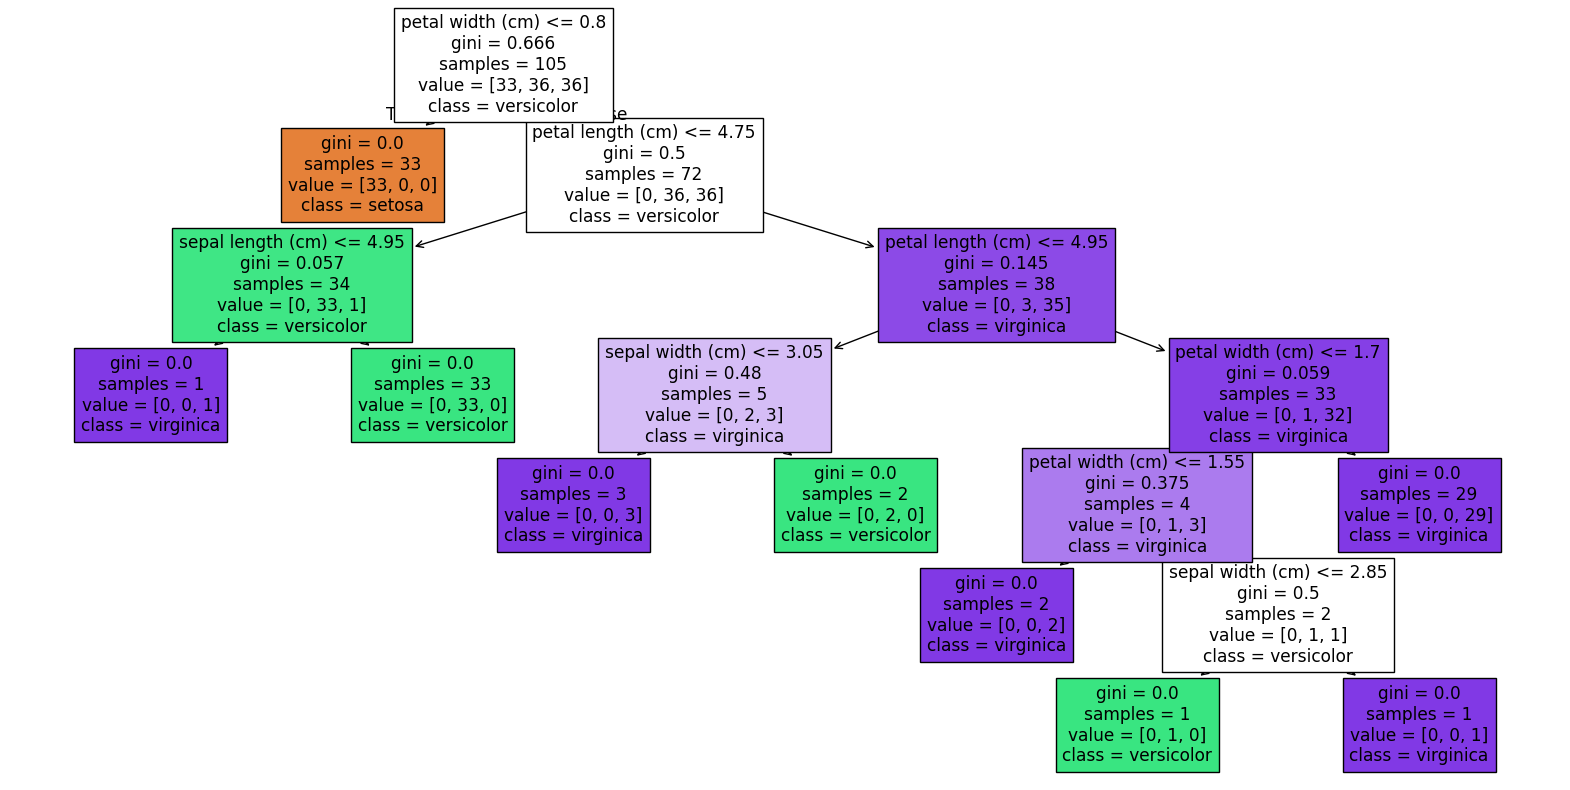

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt,feature_names=df.feature_names, class_names=df.target_names,filled = True)
plt.show()


In [ ]:
from sklearn.tree import export_text
print(export_text(dt,feature_names=df.feature_names,show_weights=True))

|--- petal width (cm) <= 0.80
|   |--- weights: [33.00, 0.00, 0.00] class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.75
|   |   |--- sepal length (cm) <= 4.95
|   |   |   |--- weights: [0.00, 0.00, 1.00] class: 2
|   |   |--- sepal length (cm) >  4.95
|   |   |   |--- weights: [0.00, 33.00, 0.00] class: 1
|   |--- petal length (cm) >  4.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- sepal width (cm) <= 3.05
|   |   |   |   |--- weights: [0.00, 0.00, 3.00] class: 2
|   |   |   |--- sepal width (cm) >  3.05
|   |   |   |   |--- weights: [0.00, 2.00, 0.00] class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.70
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- weights: [0.00, 0.00, 2.00] class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- sepal width (cm) <= 2.85
|   |   |   |   |   |   |--- weights: [0.00, 1.00, 0.00] class: 1
|   |   |   |   |   |--- sepal width (cm) >  2

In [ ]:
param_grid = {'criterion':['gini','entropy'],'max_depth':np.arange(1,10)}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid,cv=5)

In [ ]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [ ]:
dt2 = DecisionTreeClassifier(random_state=0,criterion = 'gini',max_depth=3)
dt2.fit(x_train,y_train)
print ( 'train_score = ', dt2.score(x_train, y_train))
print ( 'test_score = ', dt2.score(x_test, y_test))


train_score =  0.9714285714285714
test_score =  0.9111111111111111


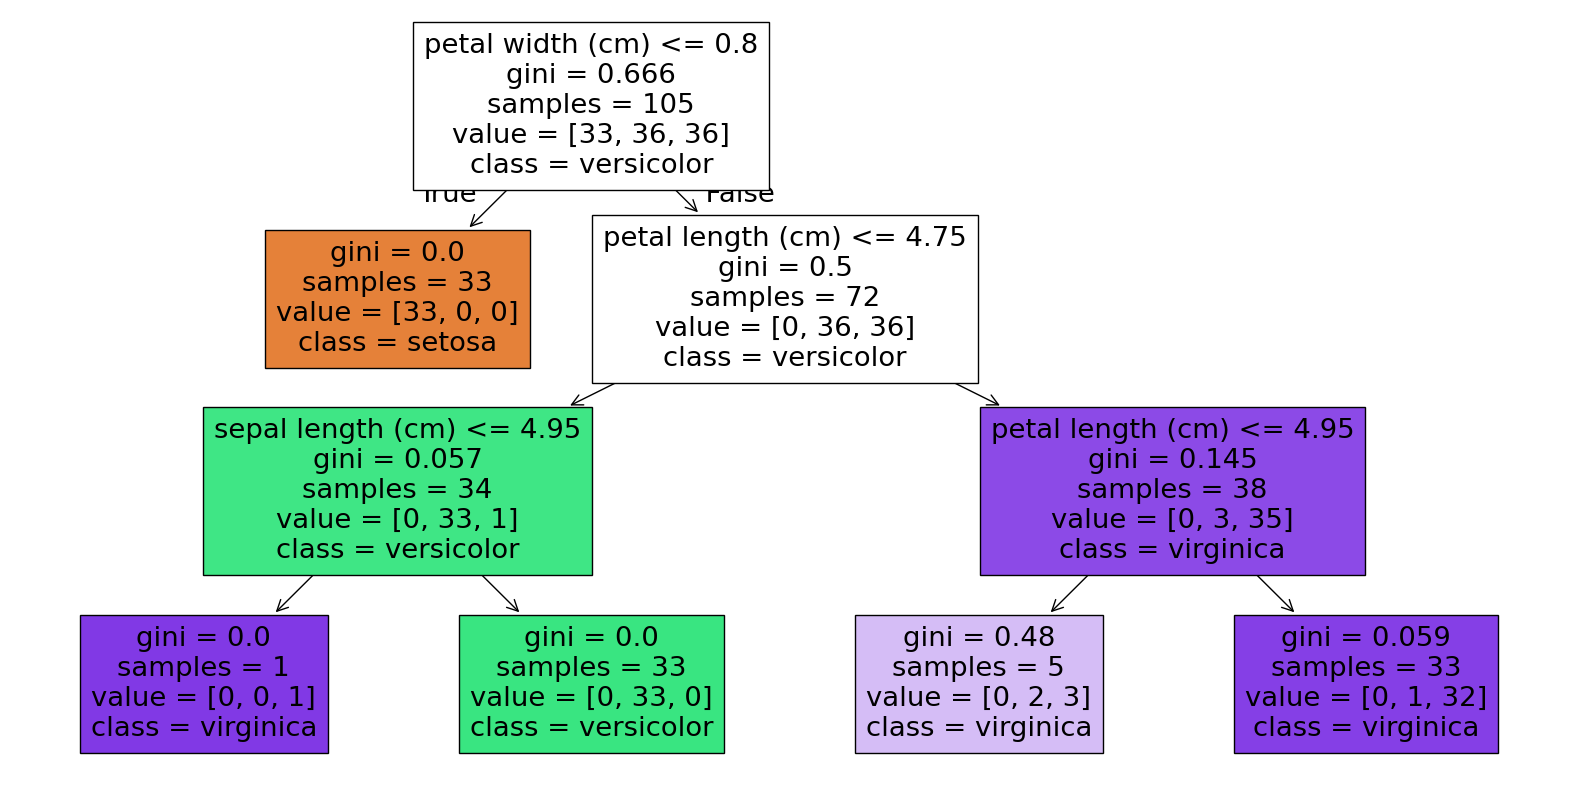

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt2,feature_names=df.feature_names, class_names=df.target_names,filled = True)
plt.show()